In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from math import log
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image

# Download the punkt and stopwords from nltk
nltk.download('stopwords')
nltk.download('punkt')

# Get the stop words and punkt from nltk
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emdoehring/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emdoehring/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# load in file
df = pd.read_csv('The Strokes Lyrics.csv', index_col=0)
df.head()

,Artist,Album,Release Date,Lyrics
The Adults Are Talking,The Strokes,The New Abnormal,"{'year': 2020, 'month': 4, 'day': 10}",They've been sayin' you're sophisticated\nThey...
Someday,The Strokes,Is This It,"{'year': 2001, 'month': 7, 'day': 30}","In many ways, they'll miss the good old days\n..."
Ode to the Mets,The Strokes,The New Abnormal,"{'year': 2020, 'month': 4, 'day': 10}","Up on his horse, up on his horse\nNot gonna wa..."
Reptilia,The Strokes,Room on Fire,"{'year': 2004, 'month': 2, 'day': 9}",He seemed impressed by the way you came in\nTe...
Selfless,The Strokes,The New Abnormal,"{'year': 2020, 'month': 4, 'day': 10}","Can the dark side light my way out? Yeah, yeah..."


In [3]:
import os 
import pandas as pd
import numpy as np

# regular expression import
import re

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    return string

def stem(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()

    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]

    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))

    # Tokenize string.
    words = word_tokenize(string)
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

def clean(text):
    '''
    This function combines the above steps and added extra stop words to clean text
    '''
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['dont', 'cant', 'im', 'ive', 'ill', 'te', 'youre', 'wan', 'na', 'wa', 
                                                                        'thats', 'wont', 'aint', 'gon'])

texts = df['Lyrics']
    
cleaned_texts = [clean(text) for text in texts]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_texts)

# Step 3: Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to a dictionary
word_tfidf = dict(zip(feature_names, tfidf_matrix.mean(axis=0).tolist()[0]))
print(word_tfidf)

{'abuse': 0.0020717088536970963, 'accept': 0.0017586635799768282, 'accident': 0.001802209930420034, 'accuse': 0.001744153231488109, 'across': 0.0014653419721265854, 'act': 0.009484849460398456, 'activity': 0.0011355186654849342, 'actor': 0.0010212737690655734, 'actually': 0.0020044731547529658, 'addiction': 0.0009904832171457225, 'adding': 0.0009285470148671983, 'address': 0.0010025142387697814, 'admired': 0.002784975431280571, 'adore': 0.0010029074774254752, 'adult': 0.0011355186654849342, 'adventure': 0.0011886597458687952, 'adversary': 0.004448888467622727, 'advertise': 0.0011355186654849342, 'advice': 0.003283826679774722, 'aeroplane': 0.0007304490735119993, 'afraid': 0.0037014120746168173, 'afterlife': 0.0020911389223204346, 'age': 0.0027538303980503723, 'ago': 0.004425820461080945, 'agree': 0.0025766437109289073, 'ah': 0.00320159220706314, 'ahah': 0.0010009032649411925, 'ahahahah': 0.0010009032649411925, 'ahead': 0.0013192269472973482, 'air': 0.002348316536529517, 'aka': 0.000657

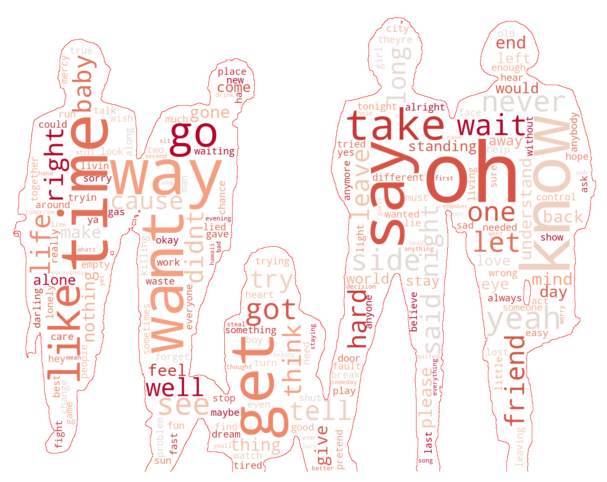

In [4]:
### colormap
# import the desired colormap from matplotlib
cmap = mpl.cm.coolwarm(np.linspace(0,1,20)) 
# the darker part of the matrix is selected for readability
cmap = mpl.colors.ListedColormap(cmap[-10:,:-1]) 

# open the image and use np.array to transform the file to an array
cand_mask=np.array(Image.open('strokes.png'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
wordcloud = WordCloud(background_color='white',
                      contour_color='red',
                      mask=cand_mask, 
                      colormap=cmap,
                      contour_width=0.5).generate_from_frequencies(word_tfidf)


#plot
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()